# Importing libraries

Libraries are modules and functions created by other people that can be imported and used without the need to program them.

In [36]:
# Data Wrangling
import pandas as pd

# Data Visualization
import seaborn as sns
import matplotlib.pyplot as plt

# Importing data

* pd = calling pandas library
* .read_csv() = method to read csv files

In [37]:
ecommerce_data = pd.read_csv('rfm.csv', delimiter=',', encoding = 'latin-1')
ecommerce_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


# Check for  descriptive statistics and dataset info

In [25]:
ecommerce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [45]:
# Converting types
ecommerce_data['CustomerID'] = ecommerce_data['CustomerID'].astype(str)
ecommerce_data['InvoiceDate'] = pd.to_datetime(ecommerce_data['InvoiceDate'])

### Handling missing values

In [6]:
ecommerce_data['CustomerID'].isna().sum()/len(ecommerce_data)

0.249266943342886

In [11]:
# Since there's no way to handle the missing data for our analysis, let's drop is
ecommerce_data = ecommerce_data.dropna(subset = 'CustomerID')
ecommerce_data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


ecommerce_data.describe()

Average number of purchases is 12, but the median is 5. This indicates the distribution is highly assimetric to the right.

# Histogram

An histogram is a graph to show frequency distribution. It looks a bit like a bar chart, but the y-axis is always the frequency of that value in the data.

In [40]:
invoice_per_customer = ecommerce_data.groupby('CustomerID')['InvoiceNo'].nunique().sort_values()

In [41]:
invoice_per_customer

CustomerID
15300.0      1
13833.0      1
16123.0      1
13829.0      1
13828.0      1
          ... 
13089.0    118
14606.0    128
17841.0    169
12748.0    224
14911.0    248
Name: InvoiceNo, Length: 4372, dtype: int64

Text(80, 1500, 'The majority of customers has between 0 and 5 purchases,\n but there are customers with over 200 purchases')

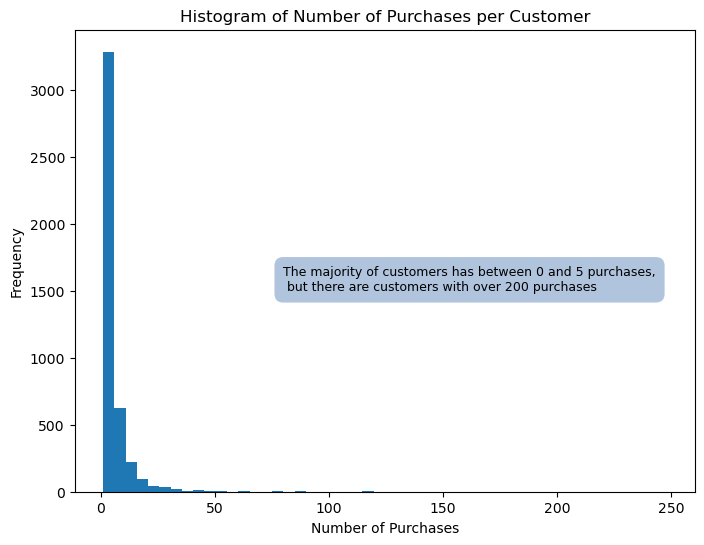

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

ax.hist(invoice_per_customer, bins = 50)

ax.set_title('Histogram of Number of Purchases per Customer')
ax.set_xlabel('Number of Purchases')
ax.set_ylabel('Frequency')

ax.text(80, 1500, "The majority of customers has between 0 and 5 purchases,\n but there are customers with over 200 purchases",
       bbox = {'facecolor': 'lightsteelblue',
               'alpha': 1,
               'pad': 0.7,
               'edgecolor': 'none',
               'boxstyle': 'round'},
       color = 'black',
       fontsize = 9)

## Checking how many customers buy monthly

In [43]:
ecommerce_data = ecommerce_data[['CustomerID', 'InvoiceNo', 'InvoiceDate']].drop_duplicates()

In [46]:
ecommerce_data['InvoiceMonth'] = ecommerce_data['InvoiceDate'].dt.to_period('M')
ecommerce_data

,CustomerID,InvoiceNo,InvoiceDate,InvoiceMonth
0,17850.0,536365,2010-12-01 08:26:00,2010-12
7,17850.0,536366,2010-12-01 08:28:00,2010-12
9,13047.0,536367,2010-12-01 08:34:00,2010-12
21,13047.0,536368,2010-12-01 08:34:00,2010-12
25,13047.0,536369,2010-12-01 08:35:00,2010-12
...,...,...,...,...
541865,13777.0,581583,2011-12-09 12:23:00,2011-12
541867,13777.0,581584,2011-12-09 12:25:00,2011-12
541869,15804.0,581585,2011-12-09 12:31:00,2011-12
541890,13113.0,581586,2011-12-09 12:49:00,2011-12


In [47]:
# Get the first cohort in which each customer is
ecommerce_data['Cohort'] = ecommerce_data.groupby('CustomerID')['InvoiceDate'].transform('min').dt.to_period('M')
ecommerce_data

,CustomerID,InvoiceNo,InvoiceDate,InvoiceMonth,Cohort
0,17850.0,536365,2010-12-01 08:26:00,2010-12,2010-12
7,17850.0,536366,2010-12-01 08:28:00,2010-12,2010-12
9,13047.0,536367,2010-12-01 08:34:00,2010-12,2010-12
21,13047.0,536368,2010-12-01 08:34:00,2010-12,2010-12
25,13047.0,536369,2010-12-01 08:35:00,2010-12,2010-12
...,...,...,...,...,...
541865,13777.0,581583,2011-12-09 12:23:00,2011-12,2010-12
541867,13777.0,581584,2011-12-09 12:25:00,2011-12,2010-12
541869,15804.0,581585,2011-12-09 12:31:00,2011-12,2011-05
541890,13113.0,581586,2011-12-09 12:49:00,2011-12,2010-12


In [53]:
cohort = ecommerce_data.groupby(['Cohort', 'InvoiceMonth']).agg(n_customers = ('CustomerID', 'nunique')) \
                .reset_index()
cohort

,Cohort,InvoiceMonth,n_customers
0,2010-12,2010-12,949
1,2010-12,2011-01,363
2,2010-12,2011-02,318
3,2010-12,2011-03,368
4,2010-12,2011-04,342
...,...,...,...
86,2011-10,2011-11,93
87,2011-10,2011-12,46
88,2011-11,2011-11,321
89,2011-11,2011-12,43


In [58]:
cohort['Period'] = (cohort['InvoiceMonth'] - cohort['Cohort']).apply(lambda x: x.n)
cohort

,Cohort,InvoiceMonth,n_customers,Period
0,2010-12,2010-12,949,0
1,2010-12,2011-01,363,1
2,2010-12,2011-02,318,2
3,2010-12,2011-03,368,3
4,2010-12,2011-04,342,4
...,...,...,...,...
86,2011-10,2011-11,93,1
87,2011-10,2011-12,46,2
88,2011-11,2011-11,321,0
89,2011-11,2011-12,43,1


In [59]:
cohort_pivot = cohort.pivot_table(index = 'Cohort', columns = 'Period', values = 'n_customers')
cohort_pivot

Period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,949.0,363.0,318.0,368.0,342.0,377.0,361.0,337.0,337.0,375.0,355.0,475.0,261.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
cohort_size = cohort_pivot.iloc[:,0]
cohort_size

Cohort
2010-12    949.0
2011-01    421.0
2011-02    380.0
2011-03    440.0
2011-04    299.0
2011-05    279.0
2011-06    235.0
2011-07    191.0
2011-08    167.0
2011-09    298.0
2011-10    352.0
2011-11    321.0
2011-12     41.0
Freq: M, Name: 0, dtype: float64

In [49]:
retention_matrix = cohort_pivot.divide(cohort_size, axis = 0)
retention_matrix

Period,0,1,2,3,4,5,6,7,8,9,10,11,12
Cohort,,,,,,,,,,,,,
2010-12,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
2011-01,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
2011-02,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
2011-03,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
2011-04,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
2011-05,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
2011-06,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


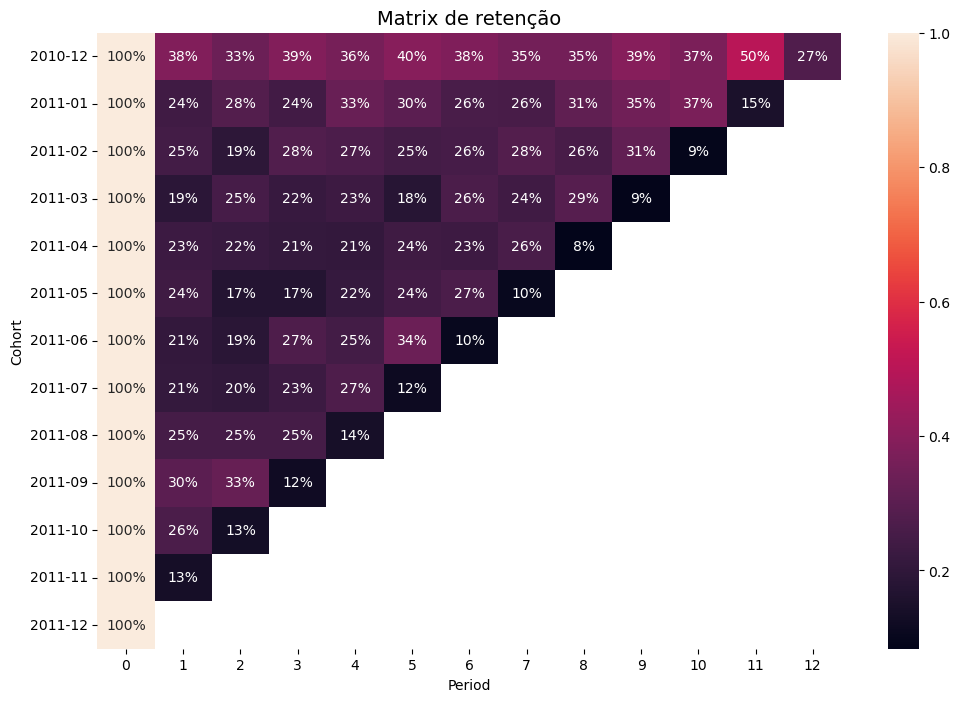

In [55]:
plt.figure(figsize=(12,8))
ax = sns.heatmap(data = retention_matrix, mask = retention_matrix.isna(), annot = True, fmt = '.0%', cmap = 'rocket')
ax.set_title('Matrix de retenção', size = 14);